# B2M KO on IGSF8 expression in vitro

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import OncoMarkAI as oma
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
oma.pl.fig_setting()
cmap = oma.pl.cmap()
sns.set_style("ticks");
sns.despine(offset=10, trim=True);

2023-11-15 18:58:26|INFO|plotting|Figure setting updated


<Figure size 1200x900 with 0 Axes>

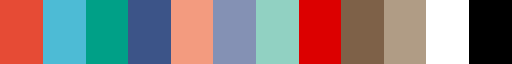

In [3]:
cmap.npg_palette

## GSE154996

In [4]:
B2M_KO = pd.read_csv("/Users/caibin/Downloads/GSE154996_FPKM_Matrix.txt.gz", sep="\t", index_col=0)
B2M_KO = B2M_KO[["M202.B2M.KO.Ctrl.FPKM", "M202.Ctrl.FPKM", "M233.B2M.KO.Ctrl.FPKM", "M233.Ctrl.FPKM"]]
B2M_KO["LogFC (M202)"] = np.log(B2M_KO["M202.B2M.KO.Ctrl.FPKM"] / B2M_KO["M202.Ctrl.FPKM"])
B2M_KO["LogFC (M233)"] = np.log(B2M_KO["M233.B2M.KO.Ctrl.FPKM"] / B2M_KO["M233.Ctrl.FPKM"])

/Users/caibin/miniconda3/envs/general/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/caibin/miniconda3/envs/general/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


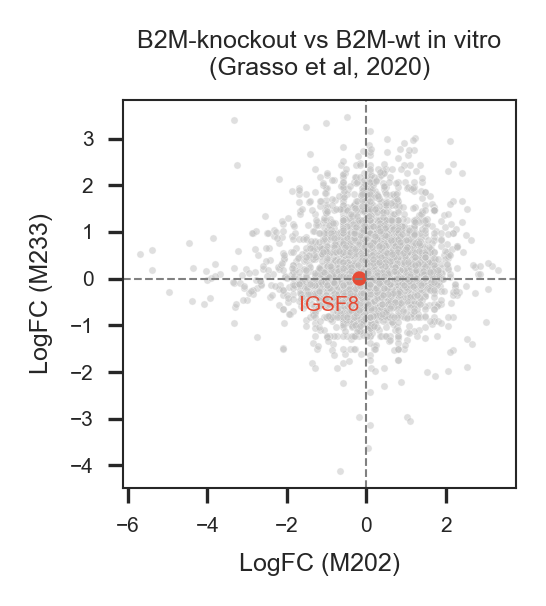

In [34]:
plt.figure(figsize=(1.8, 2))
ax = sns.scatterplot(data=B2M_KO.dropna(),
                     x="LogFC (M202)",
                     y="LogFC (M233)",
                     color="silver",
                     alpha=.5,
                     s=3
                    )
ax.axvline(0, ls="--", lw=.5, color="grey")
ax.axhline(0, ls="--", lw=.5, color="grey")
plt.scatter(x=B2M_KO.loc["IGSF8", "LogFC (M202)"],
            y=B2M_KO.loc["IGSF8", "LogFC (M233)"],
            color=cmap.npg_palette(0),
            s=6
           )

plt.text(-1.7, -.7, "IGSF8", color=cmap.npg_palette(0), fontsize=5)
plt.title("B2M-knockout vs B2M-wt in vitro\n(Grasso et al, 2020)")
plt.savefig("../figures/B2M-KO.IGSF8.pdf", bbox_inches = "tight")